Như ta thấy trong các trường hợp trên, ta không thể tách rời các lớp bằng sử dụng SVM tiêu chuẩn, thuật toán SVM theo mặc định đưa ra giả định rằng dữ liệu có thể phân tách tuyến tính nên đối với những trường hợp phi tuyến tính SVM sẽ không hiệu quả, do đó trong những trường hợp này ta phải sử dụng đến kernel SVM. Có một số kernel có sẵn trong sklearn như sau:

- Gaussian RBF Kernel
- Sigmoid Kernel
- Polynomial Kernel
###### Trong bài viết này ta sẽ sử dụng RBF kernel.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import metrics

dataset= pd.read_csv(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\iphone_purchase_records.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [2]:
labelEncoder = LabelEncoder()
X[:,0]=labelEncoder.fit_transform(X[:,0])
X=np.vstack(X[:,:]).astype(float)
X_train,X_test,y_train,y_test= train_test_split(X,y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
classifier = SVC(kernel='rbf',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm= metrics.confusion_matrix(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
print('Accuracy:\n',accuracy)

Accuracy:
 0.92


Text(0.5, 1.0, 'RBF_SVM')

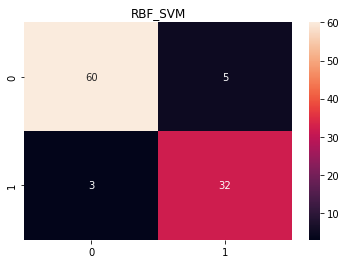

In [6]:
sns.heatmap(cm,annot=True,fmt='d').set_title('RBF_SVM')